[ 0.16637093  0.19678389  0.23055474  0.26758832  0.30768813  0.35055266
  0.39577701  0.44286034  0.49121915  0.54020626  0.58913432  0.63730277
  0.68402633  0.72866305  0.77063984  0.8094734   0.84478483  0.87630668
  0.90388192  0.92745483  0.94705479  0.96277453  0.97474499  0.98310918
  0.98799769  0.98950828  0.98769139  0.98254311  0.97400603  0.96197789
  0.94632668  0.9269108   0.90360169  0.87630668  0.84498941  0.80968573
  0.77051324  0.72767372  0.68144782  0.63218295  0.58027533  0.52614821
  0.47022834  0.4129231   0.35460058  0.29557443  0.23609495  0.17634719
  0.11645605  0.05649771 -0.00348393 -0.06345775 -0.12338494 -0.18319996
 -0.24279485 -0.30200889 -0.36062454 -0.41837013 -0.47492898 -0.52995362
 -0.58308361 -0.63396445 -0.68226553 -0.72769488 -0.770009   -0.80901699
 -0.84457873 -0.87659785 -0.9050112  -0.92977648 -0.95086046 -0.96822957
 -0.98184435 -0.99165847 -0.99762194 -0.99968772 -0.99781986 -0.99200143
 -0.98224034 -0.96857171 -0.95105652 -0.92977648 -0

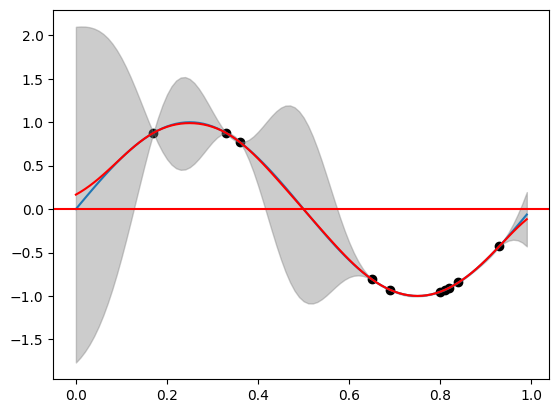

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = 1.0
f = 1
T = 1.0
samples = 100
step = 1 / samples


t = np.arange(0.0, T, step)
y = A * np.sin(2 * np.pi * f * t)


plt.plot(t, y)
# plt.show()
plt.axhline(y=0, color='r')

np.random.seed(1)
indices=np.random.choice(len(t),size=10,replace=False)
dataset_y=y[indices]
dataset_t=t[indices]

std = 1
length_scale = 0.1

def kernel(x1, x2):
    k_matrix = np.zeros((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            k_matrix[i, j] = std**2 * np.exp(-0.5 * ((x1[i] - x2[j])**2) / (length_scale**2))
    return k_matrix

# print(kernel(dataset_t,dataset_t))

# X1 = [x for x in t if x not in dataset_t]
# # print(len(X1))
# F1=[x for x in y if x not in dataset_y]
# print(len(F1))

def mean_calc(x, x1, f):
    mean_x = np.mean(f)
    dot_ker = np.dot(kernel(x, x1).T, np.linalg.inv(kernel(x, x)))
    mean_star = np.dot(dot_ker,f)
    return mean_star
mean_calculated=mean_calc(dataset_t, t, dataset_y)

print(mean_calculated)
# plt.plot(t,new, color='red')




def var_calc(x, x1):
    dot1 = np.dot(kernel(x, x1).T, np.linalg.inv(kernel(x, x)))
    dot2 = np.dot(dot1, kernel(x, x1))
    var = kernel(x1, x1) - dot2
    var += np.eye(len(x1)) * 1e-6

    return var
variance_calculated = var_calc(dataset_t, t)
std_devs = np.sqrt(np.diag(variance_calculated))

T1=t.reshape(-1,1)
plt.plot(t,mean_calculated,color='red')
plt.scatter(dataset_t,dataset_y,color='black')
plt.fill_between(t, mean_calculated -2* std_devs, mean_calculated +2* std_devs, color='gray', alpha=0.4)

plt.show()
